### Ejercicio 1 Prueba Agata Clasificación por temas #####

A continuación se realiza la solución de la prueba que se encuentra en el ejercicio pdf para el númeral 1, la idea es dejar a través de este Notebook la solución y compartirla a través del repositorio de información .

Para la solución vamos a estructurar todos los archivos que se encuentran en el folder en un solo Dataframe y a partir de allí empezar a realizar la limpieza, lemmatización quitar las stopwords , y hacer el proceso de tokenización y vectorizar cada palabra para después aplicar un modelo de temas como es el LDA Latent Dirichlet Alocation es un modelo generador que permite a partir de datos observables generar valores aleatorios mediante reglas Bayesianas, permitiendo que conjuntos de observaciones puedan ser explicados por valores no observados que explican porqué algunas partes de los datos son similares. Digamos que si las observaciones son palabras en documentos, presupone que cada documento es una mezcla de un pequeño número de categorias en este caso se reconocen como topicos o temas y la aparición de cada palabra en un documento se debe a una de las categorias a la que el documento pertenece. 

Descrito lo anterior procedemos a realizar la ejecución y explicación del codigo:

#### Función para Armar Data Frame de datos 

Con la siguiente función se realiza el recorrido a cada uno de los Nodos del archivo de donde tomaremos los valores mas importantes que nos discriminan el texto en este caso son:

*Abstract Narration

*Award Title 

*Direction Long Name

*Division Long Name

Son los nodos que tienen bastante texto y hacen referencia el documento ah que modulo pertenece. La próxima función realiza este proceso de juntar estas variables en una sola para lograr tener todo el texto junto y poder construir el modelo que segmente esta diferencia. Adicional que convierte los XML a texto plano.



In [65]:
import xml.etree.ElementTree as ET
import glob, os


def get_text_xml(file,directorio):
    tree = ET.parse(directorio + "\\" + file)
    root = tree.getroot()
    title=root.find("./Award/AwardTitle").text
    narration_text=root.find("./Award/AbstractNarration").text
    Directiontitle=root.find("./Award/Organization/Directorate/LongName").text
    Divisiontitle=root.find("./Award/Organization/Division/LongName").text
    text= str(title) + " " + str(Divisiontitle) + " " + str(Directiontitle) + " " + str(narration_text) 
    return(text)


#### Aplicación función XML a dataframe en los datos.

A continuación aplicamos la función a todos los archivos que se encuentran dentro del folder, se le aplican la funcion del módulo anterior que devuelve un data frame con una columna especifica el nombre del archivo y en la otra columna especifica el texto del documento. 

In [9]:
import os
import glob
import pandas as pd
################## Cambiar  el directorio por el deseado ########################
directorio= "E:\\Prueba_agata"
###############################################################
list_of_text = []
os.chdir(directorio)
for file in glob.glob("*.xml"):
    text=get_text_xml(file,directorio)
    list_of_text.append((text, file))
df = pd.DataFrame(list_of_text, columns = ['Text', 'Filename'])
print(df)
    

                                                    Text     Filename
0      Collaborative Research: Excellence in Research...  2000005.xml
1      Workshop on Replication of a Community-Engaged...  2000009.xml
2      Brazos Analysis Seminar Division Of Mathematic...  2000012.xml
3      Collaborative Research: ECR EIE DCL: The Devel...  2000021.xml
4      Research Initiation Award: Microwave Synthesis...  2000028.xml
...                                                  ...          ...
13293  National Center for Next Generation Manufactur...  2055767.xml
13294  NSF-BSF: Dynamics and Operator Algebras beyond...  2055771.xml
13295  Collaborative Research: SaTC: CORE: Medium: Na...  2055772.xml
13296  Collaborative Research: SaTC: CORE: Medium: Na...  2055773.xml
13297  Increasing the Cloud System Administration Ser...  2055781.xml

[13298 rows x 2 columns]


#### Proceso de Limpieza Lemmatización, eliminación de StopWords y tokenización

A continuación utilizamos la libreria NLTK para realizar los procesos de lemmatización, eliminación de stopwords y tokenización para depurar el documento y tener la información sin palabras que puedan distorcionar el modelo. 

Para ello descargamos el paquete de idioma de "punkt" en ingles y el diccionario de stopwords y wordnet que nos permite limpiar el texto de cada uno de los documentos que construimos.

Para realizar la descarga de los diccionarios se deben descomentar las líneas del código.

In [16]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

#preprocessing
from nltk.corpus import stopwords  #stopwords
from nltk import word_tokenize,sent_tokenize # tokenizing
from nltk.stem import PorterStemmer,LancasterStemmer  # using the Porter Stemmer and Lancaster Stemmer and others
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer  # lammatizer from WordNet

# for named entity recognition (NER)
from nltk import ne_chunk

#nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('wordnet')
# vectorizers for creating the document-term-matrix (DTM)
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
def clean_text(headline):
  le=WordNetLemmatizer()
  word_tokens=word_tokenize(headline)
  tokens=[le.lemmatize(w) for w in word_tokens if w not in  stopwords.words('english') and len(w)>3]
  cleaned_text=" ".join(tokens)
  return(cleaned_text)



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\giovanny.madero_davi\AppData\Roaming\nltk_dat
[nltk_data]     a...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\giovanny.madero_davi\AppData\Roaming\nltk_dat
[nltk_data]     a...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\giovanny.madero_davi\AppData\Roaming\nltk_dat
[nltk_data]     a...


Aplicamos la función descrita en el modulo anterior donde dejamos el texto limpio en la columna text_cleaned .

In [17]:
df['text_cleaned']=df['Text'].apply(clean_text)

Vectorizamos el arreglo de la columna "text_cleaned" agregandole a cada palabra una variable con un máximo de 1000 palabras por cada parrafo de texto. Esto con la finalidad de limitar la cantidad de variables dentro del texto y lograr obtener un mejor resultado de los datos. 

In [20]:
vect =TfidfVectorizer(stop_words=stopwords.words("english"),max_features=1000)
vect_text=vect.fit_transform(df['text_cleaned'])

Ajustada la transformación de Vectorización que convierte cada palabra a texto realizamos la observación de los datos para visibilizar como queda el código , a continuación se muestra el resultado de la información para los resultados donde se obtiene 13298 documentos por 1000 caracteristicas. 

In [21]:
print(vect_text.shape)
print(vect_text)

(13298, 1000)
  (0, 194)	0.011618865609372649
  (0, 769)	0.011610128335955183
  (0, 92)	0.011582214478732382
  (0, 568)	0.011601397828799848
  (0, 475)	0.011602270575332219
  (0, 367)	0.011590930136937076
  (0, 960)	0.01151013339690486
  (0, 312)	0.011597035109297134
  (0, 879)	0.011537869130617688
  (0, 993)	0.011614496126225721
  (0, 215)	0.011614496126225721
  (0, 576)	0.011611875249002182
  (0, 859)	0.011614496126225721
  (0, 743)	0.011613622432783481
  (0, 464)	0.033299825475973203
  (0, 511)	0.03161936654047892
  (0, 946)	0.040720408268084575
  (0, 603)	0.02807238998997066
  (0, 106)	0.038485441681932755
  (0, 99)	0.0393005265249216
  (0, 146)	0.04067429898775008
  (0, 482)	0.0345175721245345
  (0, 645)	0.03687279682269986
  (0, 479)	0.05918460382119272
  (0, 640)	0.03175934993925083
  :	:
  (13297, 475)	0.01519073430998221
  (13297, 367)	0.015175886389870295
  (13297, 960)	0.015070100043743219
  (13297, 312)	0.015183879567799503
  (13297, 879)	0.0453192424694526
  (13297, 993)	0

#### Aplicación del Modelo de los datos.

Transformando el arreglo de datos en valores númericos procedemos a aplicar el modelo Latent Dirichlet Allocation con una variación del algoritmo de Bayes Online, donde se agregan cuantos topicos van a estar dentro de la función, y el número aleatorio generado por la semilla se pone en 42 y el número máximo de pases sobre los datos de entrenamiento que solo afecta el comportmiento dentro del metodo de ajuste y no en el metodo de ajuste parcial 

In [43]:
from sklearn.decomposition import LatentDirichletAllocation
lda_model=LatentDirichletAllocation(n_components=8,learning_method='online',random_state=42,max_iter=1) 
lda_top=lda_model.fit_transform(vect_text)

En el próxmio modulo mostramos la forma de cada uno de los vectores de los datos. Como vemos la observación se reduce a 8 variables. Cada una de las variables queda con una componente o temaque explica el texto. 

In [44]:
print(lda_top.shape)  # (no_of_doc,no_of_topics)
print(lda_top)

(13298, 8)
[[0.86968398 0.01861627 0.01862238 ... 0.01862754 0.01859513 0.0186013 ]
 [0.01366295 0.01356186 0.01605073 ... 0.01325591 0.01312173 0.01314019]
 [0.01455795 0.01456445 0.01455851 ... 0.01455823 0.01454188 0.01455449]
 ...
 [0.02307819 0.02307929 0.02307821 ... 0.83847465 0.02305654 0.02306803]
 [0.02307819 0.02307929 0.02307821 ... 0.83847465 0.02305654 0.02306803]
 [0.01516076 0.01517257 0.01516714 ... 0.35265632 0.0151424  0.01515724]]


In [67]:
import numpy as np
topics=pd.DataFrame(np.round(lda_top))
dominant_topic = np.argmax(topics.values, axis=1)
df["dominant_topic"] = dominant_topic


Agregamos la variable con la cual queda el topic de acuerdo a las caracteristicas encontradas dentro del documento. 

In [68]:
df

,Text,Filename,text_cleaned,dominant_topic
0,Collaborative Research: Excellence in Research...,2000005.xml,Collaborative Research Excellence Research Imp...,0
1,Workshop on Replication of a Community-Engaged...,2000009.xml,Workshop Replication Community-Engaged Educati...,3
2,Brazos Analysis Seminar Division Of Mathematic...,2000012.xml,Brazos Analysis Seminar Division Mathematical ...,4
3,Collaborative Research: ECR EIE DCL: The Devel...,2000021.xml,Collaborative Research Development Validation ...,3
4,Research Initiation Award: Microwave Synthesis...,2000028.xml,Research Initiation Award Microwave Synthesis ...,0
...,...,...,...,...
13293,National Center for Next Generation Manufactur...,2055767.xml,National Center Next Generation Manufacturing ...,3
13294,NSF-BSF: Dynamics and Operator Algebras beyond...,2055771.xml,NSF-BSF Dynamics Operator Algebras beyond Elli...,4
13295,Collaborative Research: SaTC: CORE: Medium: Na...,2055772.xml,Collaborative Research SaTC CORE Medium Narrow...,5
13296,Collaborative Research: SaTC: CORE: Medium: Na...,2055773.xml,Collaborative Research SaTC CORE Medium Narrow...,5


Exportamos el resultado del dataset en el documento como se puede observar a continuación

In [64]:
df_final = df.join(topics)
df_final.to_csv("E:\\Prueba_agata\\results_test.csv")

Aqui tenemos un ejemplo de que componentes son representativas para cada uno de los documentos

In [45]:
# composition of doc 0 for eg
print("Document 0: ")
for i,topic in enumerate(lda_top[0]):
  print("Topic ",i,": ",topic*100,"%")

Document 0: 
Topic  0 :  86.96839783652818 %
Topic  1 :  1.861626780958004 %
Topic  2 :  1.8622384642792502 %
Topic  3 :  1.863123820852354 %
Topic  4 :  1.8622163116577206 %
Topic  5 :  1.8627539991963618 %
Topic  6 :  1.8595128140442168 %
Topic  7 :  1.86012997248391 %


A continuación se muestra como quedan representados los topics por cada una de las 10 palabras principales que componen cada uno de los topicos

In [46]:
# most important words for each topic
vocab = vect.get_feature_names()

for i, comp in enumerate(lda_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

Topic 0: 
cell plant protein specie biological gene biology project cellular molecular 

Topic 1: 
ocean water climate earth change carbon soil project geosciences model 

Topic 2: 
material quantum energy research manufacturing property chemistry engineering chemical metal 

Topic 3: 
stem student research education program teacher project science community engineering 

Topic 4: 
mathematical theory geometry equation problem geometric scien physical mathematics space 

Topic 5: 
data project system learning research covid 19 network technology model 

Topic 6: 
child fire informal young play learning early stem youth forest 

Topic 7: 
office education directorate stem mobility management division resource geosciences information 



C:\Users\giovanny.madero_davi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


A continuación lo realizamos para un Dataframe y poderlo exportar de acuerdo a las 15 palabras clave definir que componen cada tema y asi poder definir cada uno de los temas

In [70]:
def show_topics(vectorizer=vect, lda_model=lda_model, n_words=20):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(vectorizer=vect, lda_model=lda_model, n_words=15)

# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords



C:\Users\giovanny.madero_davi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14
Topic 0,cell,plant,protein,specie,biological,gene,biology,project,cellular,molecular,research,genetic,function,genome,animal
Topic 1,ocean,water,climate,earth,change,carbon,soil,project,geosciences,model,research,data,coastal,marine,arctic
Topic 2,material,quantum,energy,research,manufacturing,property,chemistry,engineering,chemical,metal,high,mechanical,structure,project,reaction
Topic 3,stem,student,research,education,program,teacher,project,science,community,engineering,learning,faculty,school,social,professional
Topic 4,mathematical,theory,geometry,equation,problem,geometric,scien,physical,mathematics,space,project,question,study,object,physic
Topic 5,data,project,system,learning,research,covid,19,network,technology,model,innovation,social,phase,sbir,computer
Topic 6,child,fire,informal,young,play,learning,early,stem,youth,forest,instruction,whether,core,knowledge,science
Topic 7,office,education,directorate,stem,mobility,management,division,resource,geosciences,information,engineering,learning,equity,award,undergraduate


Creamos los topics a partir de las palabras dadas las asignamos, colocamos algo que englobe todas las palabras para encerrarlo en categorias. 

In [72]:
Topics = ["Biology/Genetic","environment Science/Climate","Engineering Chemistral","Education/Social Learning","Science Mathematics/Phisical Geometry", 
          "Tecnology/Innovation", "environmental learning for young people", "Directorate for Education & Human Resources"]
df_topic_keywords["Topics"]=Topics
df_topic_keywords

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14,Topics
Topic 0,cell,plant,protein,specie,biological,gene,biology,project,cellular,molecular,research,genetic,function,genome,animal,Biology/Genetic
Topic 1,ocean,water,climate,earth,change,carbon,soil,project,geosciences,model,research,data,coastal,marine,arctic,environment Science/Climate
Topic 2,material,quantum,energy,research,manufacturing,property,chemistry,engineering,chemical,metal,high,mechanical,structure,project,reaction,Engineering Chemistral
Topic 3,stem,student,research,education,program,teacher,project,science,community,engineering,learning,faculty,school,social,professional,Education/Social Learning
Topic 4,mathematical,theory,geometry,equation,problem,geometric,scien,physical,mathematics,space,project,question,study,object,physic,Science Mathematics/Phisical Geometry
Topic 5,data,project,system,learning,research,covid,19,network,technology,model,innovation,social,phase,sbir,computer,Tecnology/Innovation
Topic 6,child,fire,informal,young,play,learning,early,stem,youth,forest,instruction,whether,core,knowledge,science,environmental learning for young people
Topic 7,office,education,directorate,stem,mobility,management,division,resource,geosciences,information,engineering,learning,equity,award,undergraduate,Directorate for Education & Human Resources


Exportamos el dataset de topics. 

In [74]:
df_topic_keywords.to_csv("E:\\Prueba_agata\\topics_words_key.csv")

A continuación realizamos un análisis de las palabras claves visualmente en nubes de palabras para ver la frecuencia dentro de cada topico

In [47]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate a word cloud image for given topic
def draw_word_cloud(index):
  imp_words_topic=""
  comp=lda_model.components_[index]
  vocab_comp = zip(vocab, comp)
  sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:50]
  for word in sorted_words:
    imp_words_topic=imp_words_topic+" "+word[0]

  wordcloud = WordCloud(width=600, height=400).generate(imp_words_topic)
  plt.figure( figsize=(5,5))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout()
  plt.show()

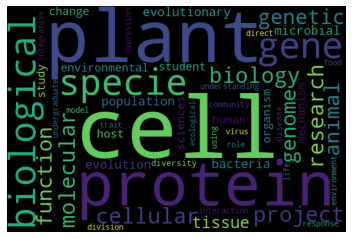

In [48]:
draw_word_cloud(0)

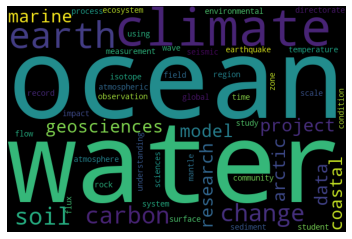

In [49]:
draw_word_cloud(1)

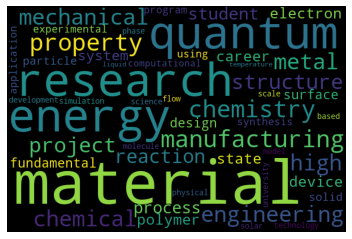

In [50]:
draw_word_cloud(2)

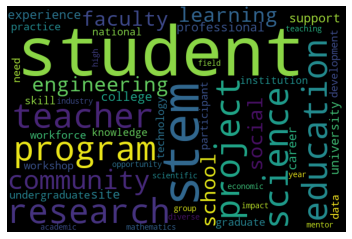

In [51]:
draw_word_cloud(3)

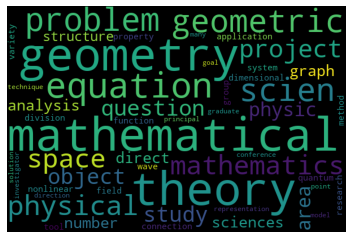

In [52]:
draw_word_cloud(4)

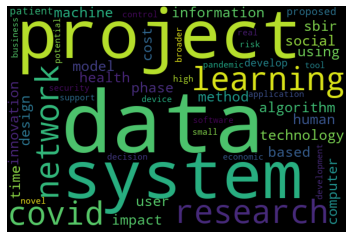

In [53]:
draw_word_cloud(5)

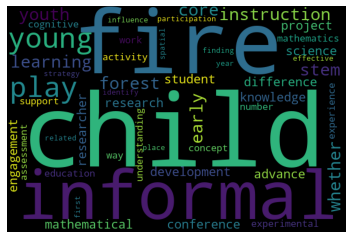

In [54]:
draw_word_cloud(6)

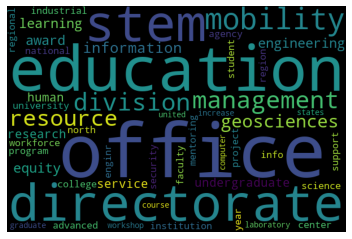

In [55]:
draw_word_cloud(7)

#### Conclusiones.

Dentro de este documento se estructura el proceso como se pueden obtener topics y categorizar los documentos para cada uno de los textos que se tienen en cualquier formato, utilizando el modelo LDA Latent Dirichlet Allocation que permite encontrar palabras claves que permiten definir un de los temas. Este modelo se puede utilizar para diferentes textos y poder clasificar los textos en blogs , poder clasificar las quejas en redes sociales y clasificarlas a algunos temas y poderle dar soluciones a los temas de manera rapida.  

Para el proceso de predicción se deben realizar todos los pasos lemmatización de las palabras, eliminar las stop words realizar el proceso de tokenización y vectorización para al final realizar la predicción del mode con el modelo ajustado.